In [236]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression


In [237]:
sal_df = pd.read_excel('2022salaries.xlsx', header = 1)

In [238]:
sal_df = sal_df.drop_duplicates(subset = "Player", keep = "first")
sal_df = sal_df.dropna(subset=['2021-22'])

In [239]:
sal_df = sal_df[~((sal_df["Signed Using"].str.contains("Pick", na=False)) & (sal_df["2021-22"] < 12632950.0))]

In [240]:
#sal_df[((sal_df["Signed Using"].str.contains("Pick", na=False)) & (sal_df["2021-22"] < 12632950.0))]

In [241]:
stats_df = pd.read_excel('2022basic.xlsx')

In [242]:
stats_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [243]:
stats_df[stats_df["Player"] == "Precious Achiuwa\\achiupr01"]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa\achiupr01,C,22,TOR,41,22,24.2,3.2,7.7,...,0.545,2.3,5.0,7.3,1.2,0.5,0.6,1.0,2.1,7.7


In [244]:
stats_df['Name'] = stats_df['Player'].str.split('\\').str[0]
sal_df['Name'] = sal_df['Player'].str.split('\\').str[0]

In [245]:
intersection = pd.Series(list(set(stats_df.Name).intersection(set(sal_df.Name))))

In [246]:
sal_3pt = []
for item in intersection:
    sal_3pt.append((item, stats_df[stats_df["Name"] == item]["3P"].values[0], sal_df[sal_df["Name"] == item]["2021-22"].values[0]))

In [247]:
sal_3pt.sort(key=lambda y: y[1], reverse=True)
#plt.plot([i[0] for i in sal_3pt], [i[1] for i in sal_3pt])

In [248]:
sal_3pt

[('Stephen Curry', 4.8, 45780966.0),
 ('Fred VanVleet', 3.9, 19675926.0),
 ('Patty Mills', 3.3, 5890000.0),
 ('Buddy Hield', 3.3, 22477273.0),
 ('Donovan Mitchell', 3.2, 28103550.0),
 ('CJ McCollum', 3.2, 30864198.0),
 ('Damian Lillard', 3.2, 39344900.0),
 ('Gary Trent Jr.', 3.2, 16000000.0),
 ('Lonzo Ball', 3.1, 18604651.0),
 ('Duncan Robinson', 3.1, 15560000.0),
 ("D'Angelo Russell", 3.0, 30013500.0),
 ('Terry Rozier', 3.0, 17905263.0),
 ('Evan Fournier', 2.9, 18139535.0),
 ('Kelly Oubre Jr.', 2.9, 12000000.0),
 ('Joe Harris', 2.9, 17357143.0),
 ("Devonte' Graham", 2.9, 11000000.0),
 ('Malik Beasley', 2.9, 14391964.0),
 ('Zach LaVine', 2.8, 19500000.0),
 ('LeBron James', 2.8, 41180544.0),
 ('Jaylen Brown', 2.8, 24830357.0),
 ('Jayson Tatum', 2.8, 28103550.0),
 ('Luke Kennard', 2.8, 12727273.0),
 ('Klay Thompson', 2.8, 37980720.0),
 ('Paul George', 2.7, 39344970.0),
 ('Max Strus', 2.7, 1669178.0),
 ('Justin Holiday', 2.6, 6006420.0),
 ('Devin Booker', 2.6, 31610000.0),
 ('Jordan Clark

Text(0, 0.5, 'Salary ($10M, 2022)')

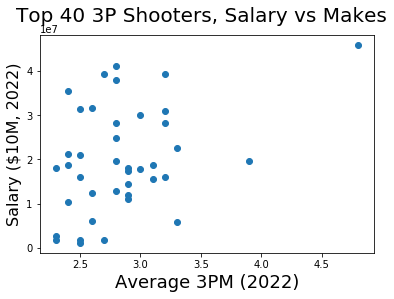

In [249]:
fig = plt.figure()

plt.scatter([i[1] for i in sal_3pt[:40]], [i[2] for i in sal_3pt[:40]])
fig.suptitle('Top 40 3P Shooters, Salary vs Makes', fontsize=20)
plt.xlabel('Average 3PM (2022)', fontsize=18)
plt.ylabel('Salary ($10M, 2022)', fontsize=16)

In [250]:
sal_trb = []
for item in intersection:
    sal_trb.append((item, stats_df[stats_df["Name"] == item]["TRB"].values[0], sal_df[sal_df["Name"] == item]["2021-22"].values[0]))

In [251]:
sal_trb.sort(key=lambda y: y[1], reverse=True)
sal_trb

[('Rudy Gobert', 15.1, 35344828.0),
 ('Nikola Jokić', 13.8, 30510423.0),
 ('Clint Capela', 12.3, 17103448.0),
 ('Domantas Sabonis', 12.1, 18562500.0),
 ('Jonas Valančiūnas', 12.0, 14000000.0),
 ('Nikola Vučević', 11.5, 24000000.0),
 ('Giannis Antetokounmpo', 11.3, 39344970.0),
 ('Joel Embiid', 10.8, 31579390.0),
 ('Jarrett Allen', 10.7, 20000000.0),
 ('Jusuf Nurkić', 10.7, 12000000.0),
 ('Deandre Ayton', 10.4, 12632950.0),
 ('Christian Wood', 10.3, 13666667.0),
 ('Bam Adebayo', 10.0, 28103550.0),
 ('Julius Randle', 9.9, 19800000.0),
 ('Anthony Davis', 9.9, 35361360.0),
 ('Karl-Anthony Towns', 9.6, 31610000.0),
 ('Steven Adams', 9.5, 17073171.0),
 ('Bobby Portis', 9.2, 4347600.0),
 ('Jakob Poeltl', 9.0, 8750000.0),
 ('Jarred Vanderbilt', 9.0, 4259259.0),
 ('Kyle Kuzma', 8.9, 13000000.0),
 ('Andre Drummond', 8.9, 2401537.0),
 ('Pascal Siakam', 8.6, 31320000.0),
 ('Dejounte Murray', 8.5, 15428571.0),
 ('Jayson Tatum', 8.4, 28103550.0),
 ('Mitchell Robinson', 8.4, 1802057.0),
 ('Ivica Zuba

Text(0, 0.5, 'Salary ($10M, 2022)')

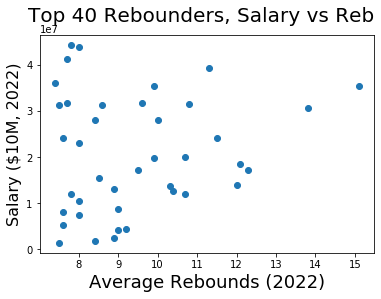

In [252]:
fig = plt.figure()

plt.scatter([i[1] for i in sal_trb[:40]], [i[2] for i in sal_trb[:40]])
fig.suptitle('Top 40 Rebounders, Salary vs Reb', fontsize=20)
plt.xlabel('Average Rebounds (2022)', fontsize=18)
plt.ylabel('Salary ($10M, 2022)', fontsize=16)

In [256]:
#stats_df['Salary'] = stats_df.Name.map(sal_df.set_index('Name')['2021-22'].to_dict())
#stats_df['Salary'] = stats_df.Name.map(sal_df.set_index('Name')['2021-22'].to_dict())
#stats_df['Salary'] = stats_df.Name.map(sal_df.set_index('Name')['2021-22'].to_dict())
#stats_df['Salary'] = stats_df.Name.map(sal_df.set_index('Name')['2021-22'].to_dict())


In [ ]:
for column in stats_df.columns:
    if stats_df[column].dtypes != 'O':
        stats_df[column] = (stats_df[column] - stats_df[column].mean()) / stats_df[column].std()

In [257]:
stats_df['Salary'] = stats_df.Name.map(sal_df.set_index('Name')['2021-22'].to_dict())


C:\Users\arvin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [258]:
stats_df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Name',
       'Salary'],
      dtype='object')

In [278]:
x = stats_df[['Age', 
       '3P', '2P', 'FT', 'FTA',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']]
y = stats_df["Salary"]


In [277]:
model = LinearRegression().fit(x, y)

In [279]:
stats_df.describe()

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,333.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,3.340000e+02
mean,-0.034162,0.427885,0.372941,0.235333,0.284215,0.255711,0.230290,0.141156,0.197629,0.173445,...,0.211178,0.281959,0.280355,0.193970,0.223915,0.176658,0.188913,0.274250,0.255957,9.605795e+06
std,0.994030,0.982893,0.778540,1.038052,0.915527,1.012757,1.010017,0.729997,1.068574,1.063073,...,1.069107,1.034925,1.038434,1.039721,0.966548,1.025872,0.982501,0.896560,1.018886,1.060151e+07
min,-1.721785,-1.624424,-1.646161,-0.771785,-1.725078,-1.267051,-1.331001,-2.960491,-1.012896,-1.130670,...,-1.087511,-1.379454,-1.392310,-0.970713,-1.345725,-0.929212,-1.174300,-1.877149,-1.248000,8.557800e+04
25%,-0.940089,-0.423108,-0.137751,-0.713407,-0.412564,-0.486853,-0.529351,-0.175539,-0.667524,-0.696052,...,-0.553485,-0.473606,-0.410824,-0.529352,-0.425971,-0.435084,-0.465274,-0.296544,-0.506601,1.782621e+06
50%,-0.011733,0.297682,0.525949,-0.217188,0.279669,0.033280,-0.044276,0.104321,-0.091904,-0.044125,...,-0.152967,0.059246,0.059471,-0.198332,0.033906,0.059044,-0.110760,0.311381,-0.001818,4.639815e+06
75%,0.793429,1.018472,0.993557,1.329845,1.078590,0.845986,0.793117,0.452440,0.829088,0.955497,...,0.648071,0.698668,0.652453,0.518879,0.953660,0.553172,0.598266,0.919306,0.818454,1.433471e+07
max,1.727652,3.661367,1.551668,2.322282,2.016454,3.457483,3.039782,3.865371,4.513055,4.302057,...,4.786766,4.695058,4.782874,4.822144,3.253045,6.482711,4.497911,2.621496,3.373916,4.578097e+07


In [280]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)


coefficient of determination: 0.7662890082376361


In [281]:
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df["ABS"] = abs(coeff_df["Coefficient"])
coeff_df.sort_values("ABS", ascending = False)


,Coefficient,ABS
TRB,1.328628e+07,1.328628e+07
DRB,-9.171795e+06,9.171795e+06
ORB,-4.053670e+06,4.053670e+06
FT,3.571873e+06,3.571873e+06
PF,-2.440177e+06,2.440177e+06
3P,2.383546e+06,2.383546e+06
AST,1.722733e+06,1.722733e+06
2P,1.596362e+06,1.596362e+06
TOV,1.507673e+06,1.507673e+06
BLK,1.507644e+06,1.507644e+06


NameError: name 'pd' is not defined